In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
url = 'https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/train.csv'
df = pd.read_csv(url)

In [12]:
df = df.drop(columns=[ 'Name','Sex','Ticket','Cabin','Embarked'],axis=1)
# df.info()          
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot: >

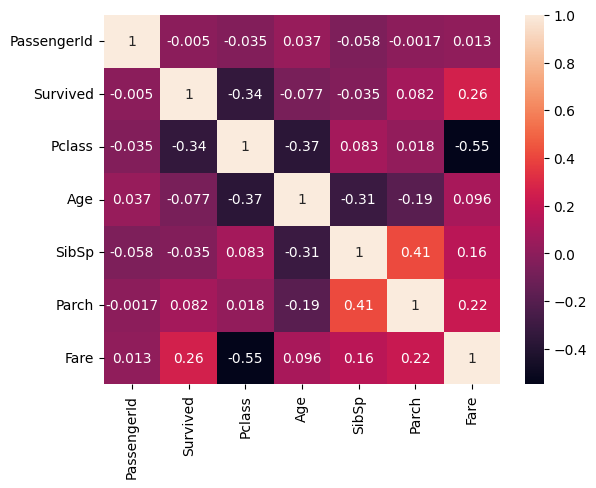

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
# mnist를 가지고 신경망을 구성(단일 , 단순)
from tensorflow.keras.datasets import mnist

In [18]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [21]:
import matplotlib.pyplot as plt

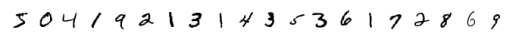

In [38]:
# 처음부터 5개만 출력해 봅시다.
for i in range(20):
    plt.subplot(1,20, i+1 )
    plt.imshow(x_train[i],cmap='gray_r')
    plt.axis('off')
plt.show()

In [39]:
# 머신러닝

In [40]:
from xgboost import XGBClassifier

In [ ]:
# 모델
# 모델.fit  --> 학습
# 평가 -- >score  ---> 우연의 일치로 높거나 낮은 성능
#    평균... 교차검증

# 옵션,, 필요하다면 예측... predict

In [43]:
xgb = XGBClassifier(n_estimators = 100, max_depth  = 3)

In [49]:
# xgb.fit(x_train,y_train)
# Please reshape the input data into 2-dimensional matrix.
x_train = x_train.reshape(60000 , 28*28)

In [50]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [51]:
xgb.score(x_train,y_train)

0.9817166666666667

In [53]:
x_test = x_test.reshape(-1 , 28*28)
xgb.score(x_test,y_test)

0.9637

In [54]:
from sklearn.model_selection import cross_validate

In [55]:
xgb = XGBClassifier(n_estimators = 100, max_depth  = 3)
scores = cross_validate(xgb,x_train,y_train,return_train_score=True)

KeyboardInterrupt: 

In [56]:
# 해당 데이터에 인공 신경망 적용

In [58]:
#                  모델                           - 학습    --> sklearn
# 신경망(Dense) - 신경망 연결(모델) -  모델 컴파일 - 학습    --> tensorflow or pytorch

In [60]:
import tensorflow as tf

In [63]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [65]:
x_train.shape, x_train.shape[1]

((60000, 784), 784)

In [69]:
dense = tf.keras.layers.Dense(10,activation='softmax',input_shape=(784,) )
model = tf.keras.Sequential(dense)
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, metrics='acc')

In [70]:
x_train = x_train / 255.0
scores = model.fit(x_train,y_train,epochs=100)

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4358 - acc: 0.8826
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3034 - acc: 0.9154
Epoch 3/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2901 - acc: 0.9199
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2840 - acc: 0.9225
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2800 - acc: 0.9244
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2777 - acc: 0.9256
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2751 - acc: 0.9266
Epoch 8/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2740 - acc: 0.9277
Epoch 9/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2727 - acc: 0.9289
Epoch 10/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2710 - acc: 0.9293
Epoch 11/100
1875/1

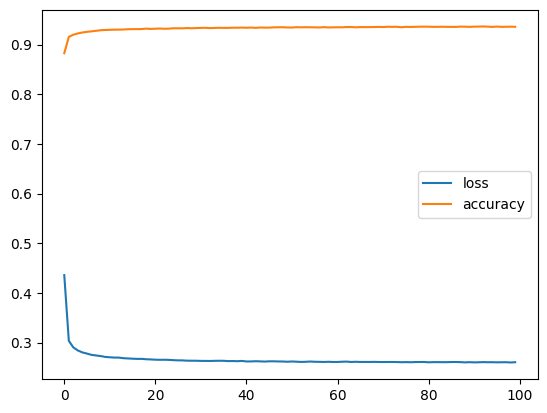

In [73]:
plt.plot(scores.history['loss'],label = 'loss')
plt.plot(scores.history['acc'], label = 'accuracy')
plt.legend()
plt.show()

In [74]:
model.evaluate(x_train,y_train)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2574 - acc: 0.9371


[0.257392942905426, 0.9370833039283752]

In [75]:
from sklearn.linear_model import SGDClassifier

In [78]:
sgd = SGDClassifier()
sgd.fit(x_train,y_train)

SGDClassifier()

In [79]:
sgd.score(x_train,y_train),sgd.score(x_test,y_test)

(0.9172666666666667, 0.8248)

In [85]:
iris = pd.read_csv('iris.data',header=None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [87]:
# sepal_length
# sepal_width
# petal_length
# petal_width
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','target']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [88]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [89]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
target           3
dtype: int64

In [91]:
import seaborn as sns

<AxesSubplot: xlabel='petal_length', ylabel='petal_width'>

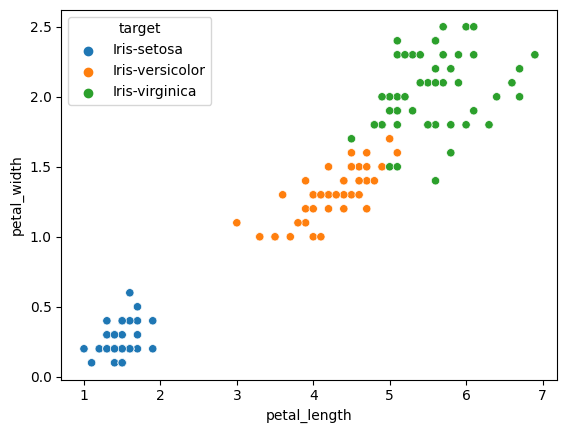

In [99]:
# sns.countplot(data=iris, y='sepal_length',hue='target')
sns.scatterplot(data=iris,x='petal_length',y = 'petal_width', hue='target')

In [100]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [101]:
np.unique(iris.target)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [104]:
Y = one_hot_target = pd.get_dummies(iris.target)

In [108]:
X  = iris.iloc[:,:-1]

In [111]:
X.shape, Y.shape

((150, 4), (150, 3))

In [112]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [129]:
le = LabelEncoder()
Y = le.fit_transform(iris.iloc[:,-1])
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [126]:
onehot = OneHotEncoder()
onehot_ = onehot.fit_transform(iris.iloc[:,-1].to_numpy().reshape(-1,1) )

In [131]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [132]:
from sklearn.model_selection import train_test_split

In [133]:
iris = pd.read_csv('iris.data',header=None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [139]:
Y = LabelEncoder().fit_transform(iris[4])
X = iris.iloc[ : , : -1 ]

In [140]:
x_train,x_test,y_train,y_test =  train_test_split(X,Y,test_size=0.2,random_state=0)

In [141]:
# 품종이 3가지 분류..... 
# 머신러닝  or 신경망(단일  신경망)

In [142]:
x_train.shape

(120, 4)

In [157]:
# (Dense, Sequence, Compile) - > 모델
dense = tf.keras.layers.Dense(3 ,activation='softmax'  ,input_shape = (4,)  )
model = tf.keras.Sequential(dense)
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, metrics='acc')

In [158]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
x_train_scaled = ss.fit_transform(x_train)
model.fit(x_train_scaled,y_train,epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6501 - acc: 0.8167
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6401 - acc: 0.8167
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6334 - acc: 0.8250
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6275 - acc: 0.8333
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6222 - acc: 0.8250
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6171 - acc: 0.8167
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6122 - acc: 0.8250
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6075 - acc: 0.8167
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6028 - acc: 0.8167
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5983 - acc: 0.8250
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5940 